# Predicting Hard Disk Drive Failures using Machine Learning

## This notebook contains:
1. Performing EDA on  'Hard Disk Drive Failure' dataset provided on Kaggle
2. Using ML to build a model which can predict whether a HDD is likely to fail or not. 

# Step 1: Exploratory Data Analysis (EDA)

In [1]:

#First we import all the libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.utils import resample

In [2]:
target = 'failure'   #defining a global variable

In [3]:

df_train = pd.read_csv("/kaggle/input/hard-drive-data-and-stats/data_Q3_2019/data_Q3_2019/2019-07-09.csv")  #Training Dataset

df_test = pd.read_csv("/kaggle/input/hard-drive-data-and-stats/data_Q3_2019/data_Q3_2019/2019-07-10.csv")    #Test Dataset


In [4]:
df_train.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2019-07-09,Z305B2QN,ST4000DM000,4000787030016,0,117.0,164080560.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-07-09,ZJV0XJQ4,ST12000NM0007,12000138625024,0,74.0,26485032.0,NaN,NaN,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-07-09,ZJV0XJQ3,ST12000NM0007,12000138625024,0,78.0,59128456.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-09,ZJV0XJQ0,ST12000NM0007,12000138625024,0,82.0,168952432.0,NaN,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-07-09,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,100.0,0.0,134.0,103.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_train.describe()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
count,1.105940e+05,110594.000000,110524.000000,1.105240e+05,29324.000000,29324.00000,110467.000000,110467.000000,110467.000000,110467.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,278.000000,278.0,0.0,0.0
mean,8.283346e+12,0.000072,92.126850,8.909457e+07,124.950416,67.69779,96.762599,162.286140,99.998615,8.091910,...,1.0,5933831.0,1.0,32965.0,100.0,0.0,103.956835,0.0,NaN,NaN
std,3.605447e+12,0.008505,15.458934,8.103028e+07,22.867321,48.33119,10.447465,847.150167,0.118942,125.188906,...,NaN,NaN,NaN,NaN,NaN,NaN,19.529436,0.0,NaN,NaN
min,-1.000000e+00,0.000000,55.000000,0.000000e+00,86.000000,0.00000,79.000000,0.000000,75.000000,1.000000,...,1.0,5933831.0,1.0,32965.0,100.0,0.0,100.000000,0.0,NaN,NaN
25%,4.000787e+12,0.000000,81.000000,0.000000e+00,100.000000,0.00000,92.000000,0.000000,100.000000,3.000000,...,1.0,5933831.0,1.0,32965.0,100.0,0.0,100.000000,0.0,NaN,NaN
50%,8.001563e+12,0.000000,84.000000,7.687377e+07,133.000000,100.00000,95.000000,0.000000,100.000000,5.000000,...,1.0,5933831.0,1.0,32965.0,100.0,0.0,100.000000,0.0,NaN,NaN
75%,1.200014e+13,0.000000,100.000000,1.611459e+08,134.000000,103.00000,100.000000,0.000000,100.000000,8.000000,...,1.0,5933831.0,1.0,32965.0,100.0,0.0,100.000000,0.0,NaN,NaN
max,1.400052e+13,1.000000,200.000000,2.441399e+08,252.000000,1061.00000,253.000000,11042.000000,100.000000,25137.000000,...,1.0,5933831.0,1.0,32965.0,100.0,0.0,200.000000,0.0,NaN,NaN


In [6]:
df_test.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2019-07-10,Z305B2QN,ST4000DM000,4000787030016,0,113.0,56745112.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-07-10,ZJV0XJQ4,ST12000NM0007,12000138625024,0,84.0,227897104.0,NaN,NaN,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-07-10,ZJV0XJQ3,ST12000NM0007,12000138625024,0,72.0,14755544.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-10,ZJV0XJQ0,ST12000NM0007,12000138625024,0,81.0,121743376.0,NaN,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-07-10,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,100.0,0.0,134.0,103.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_test.describe()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
count,1.105930e+05,110593.000000,110573.000000,1.105730e+05,29325.000000,29325.000000,110515.000000,110515.000000,110515.000000,110515.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,278.000000,278.0,0.0,0.0
mean,8.288664e+12,0.000081,92.126749,8.903960e+07,124.946974,67.701176,96.759969,162.556196,99.998616,8.065068,...,1.0,6019812.0,1.0,33418.0,100.0,0.0,103.956835,0.0,NaN,NaN
std,3.602013e+12,0.009021,15.477406,8.105720e+07,22.855116,48.328868,10.453542,846.972228,0.118916,125.149512,...,NaN,NaN,NaN,NaN,NaN,NaN,19.529436,0.0,NaN,NaN
min,2.500594e+11,0.000000,63.000000,0.000000e+00,86.000000,0.000000,79.000000,0.000000,75.000000,1.000000,...,1.0,6019812.0,1.0,33418.0,100.0,0.0,100.000000,0.0,NaN,NaN
25%,4.000787e+12,0.000000,81.000000,0.000000e+00,100.000000,0.000000,92.000000,0.000000,100.000000,3.000000,...,1.0,6019812.0,1.0,33418.0,100.0,0.0,100.000000,0.0,NaN,NaN
50%,8.001563e+12,0.000000,84.000000,7.637164e+07,133.000000,100.000000,95.000000,0.000000,100.000000,5.000000,...,1.0,6019812.0,1.0,33418.0,100.0,0.0,100.000000,0.0,NaN,NaN
75%,1.200014e+13,0.000000,100.000000,1.606630e+08,134.000000,103.000000,100.000000,0.000000,100.000000,8.000000,...,1.0,6019812.0,1.0,33418.0,100.0,0.0,100.000000,0.0,NaN,NaN
max,1.400052e+13,1.000000,200.000000,2.441354e+08,252.000000,1061.000000,253.000000,11042.000000,100.000000,25137.000000,...,1.0,6019812.0,1.0,33418.0,100.0,0.0,200.000000,0.0,NaN,NaN


In [8]:
print(df_train.shape)
print('*'*50)
print(df_test.shape)

(110594, 129)
**************************************************
(110593, 129)


## Distribution of target variable (Failure)


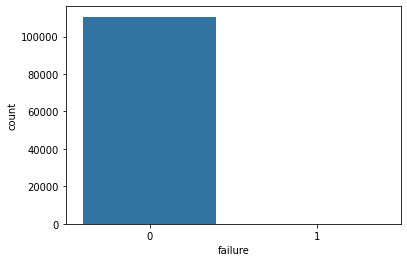

In [9]:
sns.countplot(df_train['failure'])    #Checking the distribution of the target variable

##   Balancing the dataset

*  Upsampling the minority class for train data

In [10]:

valid = df_train[df_train['failure'] == 0]    #data of HDDs which do not indicate failure
failed = df_train[df_train['failure'] == 1]   #data of HDDs likely to fail

print("valid hdds:",len(valid))      #storing the total number of valid HDDs
print("failing hdds:",len(failed))    #storing the total number of HDDs likely to fail

valid hdds: 110586
failing hdds: 8


In [11]:
#Since the number of HDDs indicating failure are too low, we proceed to upsample the minority class viz.'failure'

# We perform this step to prevent our final model from being biased

   #Resampling of the failure class to match the length of valid HDDs

failed_up = resample(failed,replace=True,n_samples=len(valid),random_state=27)  

In [12]:
#Finally we concatenate our newly resampled classes with our training data

df_train = pd.concat([valid,failed_up])
df_train.failure.value_counts()       #Levelling the count of both classes

1    110586
0    110586
Name: failure, dtype: int64

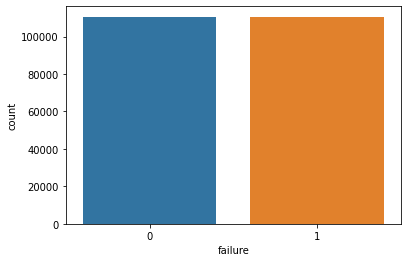

In [13]:
sns.countplot(df_train['failure'])

In [14]:
df_train

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2019-07-09,Z305B2QN,ST4000DM000,4000787030016,0,117.0,164080560.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-07-09,ZJV0XJQ4,ST12000NM0007,12000138625024,0,74.0,26485032.0,NaN,NaN,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-07-09,ZJV0XJQ3,ST12000NM0007,12000138625024,0,78.0,59128456.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-09,ZJV0XJQ0,ST12000NM0007,12000138625024,0,82.0,168952432.0,NaN,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-07-09,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,100.0,0.0,134.0,103.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43494,2019-07-09,PL1331LAHBYGHH,HGST HMS5C4040BLE640,4000787030016,1,100.0,0.0,134.0,100.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52771,2019-07-09,ZCH0A2M8,ST12000NM0007,12000138625024,1,82.0,160374752.0,NaN,NaN,89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102124,2019-07-09,S300Z4HB,ST4000DM000,4000787030016,1,118.0,189273336.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5063,2019-07-09,ZJV00HVH,ST12000NM0007,12000138625024,1,83.0,184598328.0,NaN,NaN,89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_train.shape  # You can notice the dimensions have doubled for our training dataset

(221172, 129)

 ##   Feature Selection and filling of missing values

###  For the training data:

In [16]:
df_train.isnull().sum()

date                         0
serial_number                0
model                        0
capacity_bytes               0
failure                      0
                         ...  
smart_252_raw           221171
smart_254_normalized    220894
smart_254_raw           220894
smart_255_normalized    221172
smart_255_raw           221172
Length: 129, dtype: int64

*  Selecting features with high correlation to hdd failure:

In [17]:
# features which highly correlate to HDD failure as per BackBlaze 

# https://www.backblaze.com/blog/what-smart-stats-indicate-hard-drive-failures/

# SMART 5 		Reallocated Sectors Count
# SMART 187 		Reported Uncorrectable Errors
# SMART 188 		Command Timeout
# SMART 197 		Current Pending Sector Count
# SMART 198 		Uncorrectable Sector Count

In [18]:
features = ['date',
 'serial_number',
 'model',
 'capacity_bytes',
 'failure',
'smart_5_raw','smart_187_raw','smart_188_raw','smart_197_raw','smart_198_raw']

In [19]:
misc_feat = [fname for fname in df_train if fname not in features]  #misc features to be dropped 
misc_feat

['smart_1_normalized',
 'smart_1_raw',
 'smart_2_normalized',
 'smart_2_raw',
 'smart_3_normalized',
 'smart_3_raw',
 'smart_4_normalized',
 'smart_4_raw',
 'smart_5_normalized',
 'smart_7_normalized',
 'smart_7_raw',
 'smart_8_normalized',
 'smart_8_raw',
 'smart_9_normalized',
 'smart_9_raw',
 'smart_10_normalized',
 'smart_10_raw',
 'smart_11_normalized',
 'smart_11_raw',
 'smart_12_normalized',
 'smart_12_raw',
 'smart_13_normalized',
 'smart_13_raw',
 'smart_15_normalized',
 'smart_15_raw',
 'smart_16_normalized',
 'smart_16_raw',
 'smart_17_normalized',
 'smart_17_raw',
 'smart_22_normalized',
 'smart_22_raw',
 'smart_23_normalized',
 'smart_23_raw',
 'smart_24_normalized',
 'smart_24_raw',
 'smart_168_normalized',
 'smart_168_raw',
 'smart_170_normalized',
 'smart_170_raw',
 'smart_173_normalized',
 'smart_173_raw',
 'smart_174_normalized',
 'smart_174_raw',
 'smart_177_normalized',
 'smart_177_raw',
 'smart_179_normalized',
 'smart_179_raw',
 'smart_181_normalized',
 'smart_181

In [20]:
df_train.drop(misc_feat,inplace=True,axis=1)  #Dropping the misc features

In [21]:
df_train

,date,serial_number,model,capacity_bytes,failure,smart_5_raw,smart_187_raw,smart_188_raw,smart_197_raw,smart_198_raw
0,2019-07-09,Z305B2QN,ST4000DM000,4000787030016,0,0.0,0.0,0.0,0.0,0.0
1,2019-07-09,ZJV0XJQ4,ST12000NM0007,12000138625024,0,0.0,0.0,0.0,0.0,0.0
2,2019-07-09,ZJV0XJQ3,ST12000NM0007,12000138625024,0,0.0,0.0,0.0,0.0,0.0
3,2019-07-09,ZJV0XJQ0,ST12000NM0007,12000138625024,0,0.0,0.0,0.0,0.0,0.0
4,2019-07-09,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,0.0,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
43494,2019-07-09,PL1331LAHBYGHH,HGST HMS5C4040BLE640,4000787030016,1,352.0,NaN,NaN,96.0,0.0
52771,2019-07-09,ZCH0A2M8,ST12000NM0007,12000138625024,1,0.0,0.0,0.0,0.0,0.0
102124,2019-07-09,S300Z4HB,ST4000DM000,4000787030016,1,0.0,0.0,0.0,0.0,0.0
5063,2019-07-09,ZJV00HVH,ST12000NM0007,12000138625024,1,40.0,0.0,0.0,0.0,0.0


In [22]:
# Since our model cannot proccess string values, we remove the columns which contain string values/object values 
# to avoid errors

obj = df_train.dtypes[df_train.dtypes == object ].index  
obj

Index(['date', 'serial_number', 'model'], dtype='object')

In [23]:
df_train = df_train.drop(obj,axis=1)

*  Handling missing values

In [24]:
df_train.isnull().sum()  #Total number of missing values 

capacity_bytes        0
failure               0
smart_5_raw         127
smart_187_raw     43635
smart_188_raw     43635
smart_197_raw       127
smart_198_raw       127
dtype: int64

In [25]:
#After going through the dataset,i found that the drives which were missing values did not correlate to its failure

#  i.e all drives indicating failure did not contain missing values

# Hence i replaced them with the most commonly occuring values for the respective SMART attributes

df_train['smart_187_raw'] = df_train['smart_187_raw'].fillna(0)  

In [26]:
df_train['smart_5_raw'] = df_train['smart_5_raw'].fillna(0)

In [27]:
df_train['smart_188_raw'] = df_train['smart_188_raw'].fillna(0)

In [28]:
df_train['smart_197_raw'] = df_train['smart_197_raw'].fillna(0)

In [29]:
df_train['smart_198_raw'] = df_train['smart_198_raw'].fillna(0)

In [30]:
df_train.isnull().sum()

capacity_bytes    0
failure           0
smart_5_raw       0
smart_187_raw     0
smart_188_raw     0
smart_197_raw     0
smart_198_raw     0
dtype: int64

In [31]:
df_train = df_train.drop('capacity_bytes',axis=1)

In [32]:
df_train

,failure,smart_5_raw,smart_187_raw,smart_188_raw,smart_197_raw,smart_198_raw
0,0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
43494,1,352.0,0.0,0.0,96.0,0.0
52771,1,0.0,0.0,0.0,0.0,0.0
102124,1,0.0,0.0,0.0,0.0,0.0
5063,1,40.0,0.0,0.0,0.0,0.0


*   Splitting the values for X_train and Y_train 

In [33]:
X_train = df_train.drop('failure',axis=1)
Y_train = df_train['failure']

###  For Test data:

*    Upsampling of test data to match the dimensionality of the test and train data (optional)
####  Note : You can skip this step if using TrainTestSplit function

In [34]:
valid_test = df_test[df_test['failure'] == 0]
failed_test = df_test[df_test['failure'] == 1]

print("valid hdds:",len(valid_test))
print("failing hdds:",len(failed_test))

valid hdds: 110584
failing hdds: 9


In [35]:
failed_up_test = resample(failed,replace=True,n_samples=len(valid),random_state=27) #Same steps as in Training data

In [36]:
df_test = pd.concat([valid_test,failed_up_test])
df_test.failure.value_counts()

1    110586
0    110584
Name: failure, dtype: int64

In [37]:
df_test.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2019-07-10,Z305B2QN,ST4000DM000,4000787030016,0,113.0,56745112.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-07-10,ZJV0XJQ4,ST12000NM0007,12000138625024,0,84.0,227897104.0,NaN,NaN,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-07-10,ZJV0XJQ3,ST12000NM0007,12000138625024,0,72.0,14755544.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-10,ZJV0XJQ0,ST12000NM0007,12000138625024,0,81.0,121743376.0,NaN,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-07-10,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,100.0,0.0,134.0,103.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_test.shape

(221170, 129)

*   Feature Selection for test data

In [39]:
df_test.drop(misc_feat,inplace=True,axis=1) #Since we have the imp features, we move ahead to drop the misc ones

In [40]:
df_test

,date,serial_number,model,capacity_bytes,failure,smart_5_raw,smart_187_raw,smart_188_raw,smart_197_raw,smart_198_raw
0,2019-07-10,Z305B2QN,ST4000DM000,4000787030016,0,0.0,0.0,0.0,0.0,0.0
1,2019-07-10,ZJV0XJQ4,ST12000NM0007,12000138625024,0,0.0,0.0,0.0,0.0,0.0
2,2019-07-10,ZJV0XJQ3,ST12000NM0007,12000138625024,0,0.0,0.0,0.0,0.0,0.0
3,2019-07-10,ZJV0XJQ0,ST12000NM0007,12000138625024,0,0.0,0.0,0.0,0.0,0.0
4,2019-07-10,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,0.0,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
43494,2019-07-09,PL1331LAHBYGHH,HGST HMS5C4040BLE640,4000787030016,1,352.0,NaN,NaN,96.0,0.0
52771,2019-07-09,ZCH0A2M8,ST12000NM0007,12000138625024,1,0.0,0.0,0.0,0.0,0.0
102124,2019-07-09,S300Z4HB,ST4000DM000,4000787030016,1,0.0,0.0,0.0,0.0,0.0
5063,2019-07-09,ZJV00HVH,ST12000NM0007,12000138625024,1,40.0,0.0,0.0,0.0,0.0


###    Filling out missing values for test data

 ####  We perform this step as our model cannot use NaN data

In [41]:
df_test['smart_187_raw'] = df_test['smart_187_raw'].fillna(0)

In [42]:
df_test['smart_5_raw'] = df_test['smart_5_raw'].fillna(0)

In [43]:
df_test['smart_188_raw'] = df_test['smart_188_raw'].fillna(0)

In [44]:
df_test['smart_197_raw'] =df_test['smart_197_raw'].fillna(0)

In [45]:
df_test['smart_198_raw'] = df_test['smart_198_raw'].fillna(0)

In [46]:
df_test.isnull().sum()

date              0
serial_number     0
model             0
capacity_bytes    0
failure           0
smart_5_raw       0
smart_187_raw     0
smart_188_raw     0
smart_197_raw     0
smart_198_raw     0
dtype: int64

In [47]:
df_test = df_test.drop(obj,axis=1)

In [48]:
df_test = df_test.drop('capacity_bytes',axis=1)

In [49]:
df_test

,failure,smart_5_raw,smart_187_raw,smart_188_raw,smart_197_raw,smart_198_raw
0,0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
43494,1,352.0,0.0,0.0,96.0,0.0
52771,1,0.0,0.0,0.0,0.0,0.0
102124,1,0.0,0.0,0.0,0.0,0.0
5063,1,40.0,0.0,0.0,0.0,0.0


##  Splitting values for X_test and Y_test (Optional)
 #### Note: Please skip this step if using TrainTestSpilt Method

In [50]:
X_test = df_test.drop('failure',axis=1)


In [51]:
Y_test = df_test['failure']

In [52]:
df_test.shape

(221170, 6)


# Step 2: Building the model using Random Forest:

 ## Model 1: RF Using X_test and Y_test
### Note : Please refer Model 2 if using Train_Test_Split

In [53]:
 #Building the Random Forest Classifier (RANDOM FOREST) 
from sklearn.ensemble import RandomForestClassifier 

# random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(X_train, Y_train) 

# predictions(Notice the caps'P' of yPred to differentiate between model 1 and 2) 
yPred = rfc.predict(X_test) 

In [54]:
#Results of our predictions

from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
  
n_outliers = len(failed) 
n_errors = (yPred != Y_test).sum()        #Notice the Y_test from iii) of Test Data
print("Model used is: Random Forest classifier") 
  
acc = accuracy_score(Y_test, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(Y_test, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(Y_test, yPred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(Y_test, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(Y_test, yPred) 
print("The Matthews correlation coefficient is {}".format(MCC)) 


Model used is: Random Forest classifier
The accuracy is 0.8084821630420039
The precision is 0.9887252514254606
The recall is 0.6240844229830177
The F1-Score is 0.7651839368472404
The Matthews correlation coefficient is 0.663754767354101


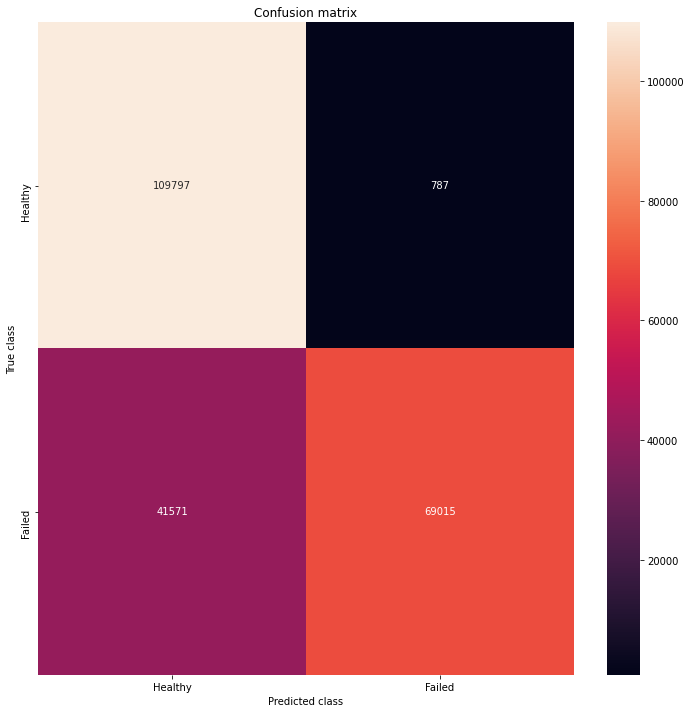

In [55]:
 # confusion matrix 

LABELS = ['Healthy', 'Failed'] 
conf_matrix = confusion_matrix(Y_test, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

 ## Model 2: RF Using the Train_Test_Split Method 

In [56]:
xData = X_train.values
yData = Y_train.values

In [57]:
from sklearn.model_selection import train_test_split 

# Splitting of data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split( 
        xData, yData, test_size = 0.2, random_state = 42) 

In [58]:

#Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier 

# RF model creation 
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 

# predictions (notice the small 'p' to differentiate from model 1) 
ypred = rfc.predict(xTest) 


In [59]:
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
  
n_outliers = len(failed) 
n_errors = (ypred != yTest).sum()                             #yTest from the Train_Test_Split function
print("Model used is : Random Forest classifier") 
  
acc = accuracy_score(yTest, ypred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(yTest, ypred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(yTest, ypred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(yTest, ypred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(yTest, ypred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 


Model used is : Random Forest classifier
The accuracy is 0.8051995026562676
The precision is 0.9896265560165975
The recall is 0.6201748486886348
The F1-Score is 0.7625058567373149
The Matthews correlation coefficient is0.6598482534762142


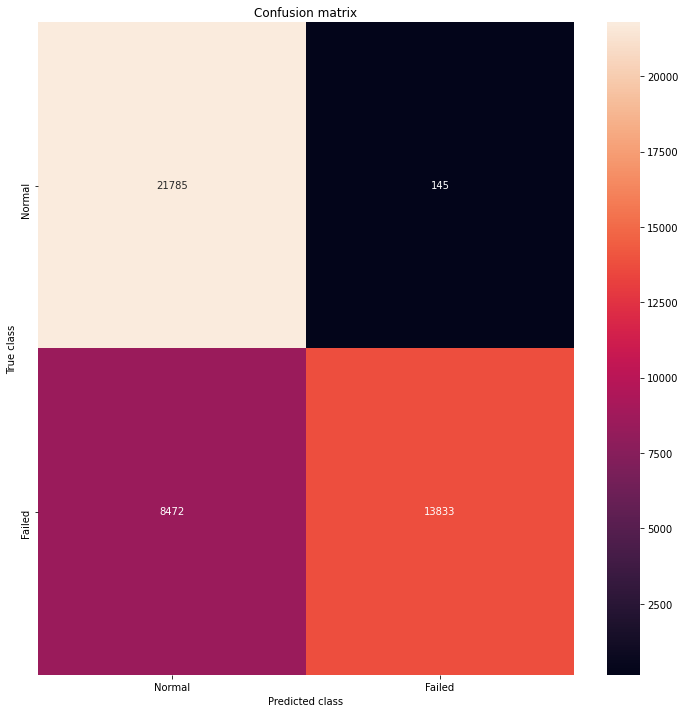

In [60]:
# confusion matrix 

LABELS = ['Normal', 'Failed'] 
conf_matrix = confusion_matrix(yTest, ypred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

## That's it folks! Thank you for your time!
## Would love to hear your comments and valuable feedback!  :)

### Dataset : https://www.kaggle.com/jackywangkaggle/hard-drive-data-and-stats